## Zomato Data Analysis Project

## 1. Problem Statement

To address our analysis, we need to respond to the subsequent inquiries:

1. Do a greater number of restaurants provide online delivery as opposed to offline services?
2. Which types of restaurants are the most favored by the general public?
3. What price range is preferred by couples for their dinner at restaurants?

Let's utilize some key libraries to help us

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zomato = pd.read_csv("C:/Users/Ali Hammad/Data Analysis Training/Datasets/Zomato_data.csv")

In [4]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
zomato.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


### Data Preparation

Looking for any null values, missing values, Overall shape

In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
zomato.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
zomato['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [16]:
zomato[zomato['votes'] > 500]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
31,Foodiction,Yes,No,2.8/5,506,500,other
48,Beijing Bites,Yes,No,3.7/5,679,850,Dining
14,San Churro Cafe,Yes,No,3.8/5,918,800,Cafes
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
55,FreshMenu,Yes,No,3.9/5,627,450,Dining
43,Domino's Pizza,Yes,No,3.9/5,540,800,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
47,Recipe,Yes,No,4.0/5,804,450,Dining
53,Biryanis And More,Yes,No,4.0/5,618,750,Dining
54,Roving Feast,No,No,4.0/5,1047,450,Dining


In [4]:
dining = zomato[zomato['listed_in(type)'] == 'Dining']
dining_cost = dining["approx_cost(for two people)"].sum()

buffet = zomato[zomato['listed_in(type)'] == 'Buffet']
buffet_cost = buffet["approx_cost(for two people)"].sum()

cafes = zomato[zomato['listed_in(type)'] == 'Cafes']
cafes_cost = cafes["approx_cost(for two people)"].sum()

other = zomato[zomato['listed_in(type)'] == 'other']
other_cost = other["approx_cost(for two people)"].sum()

book_table = zomato[zomato['book_table'] == 'Yes']
total_bk = book_table["approx_cost(for two people)"].sum()
total_nbk = (zomato["approx_cost(for two people)"].sum() - total_bk)

total_online = zomato[zomato['online_order'] == 'Yes']
total_online_cost = total_online["approx_cost(for two people)"].sum()

total_offline = zomato[zomato['online_order'] == 'No']
total_offline_cost= total_offline["approx_cost(for two people)"].sum()

### Which Dine-In Type is mostly preferred and its contribution in Revenue ??

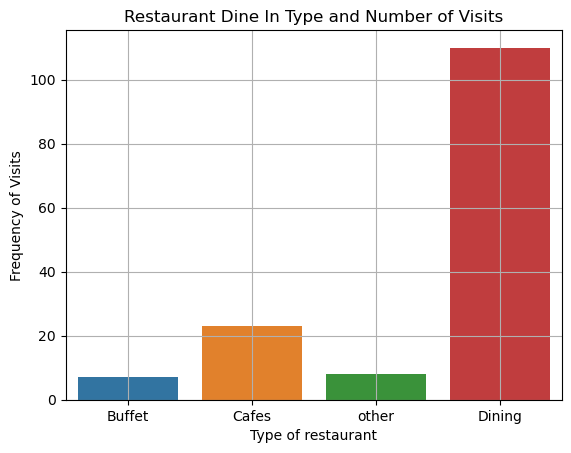

In [10]:
sns.countplot(x=zomato['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.ylabel('Frequency of Visits')
plt.title('Restaurant Dine In Type and Number of Visits')
plt.grid('True')

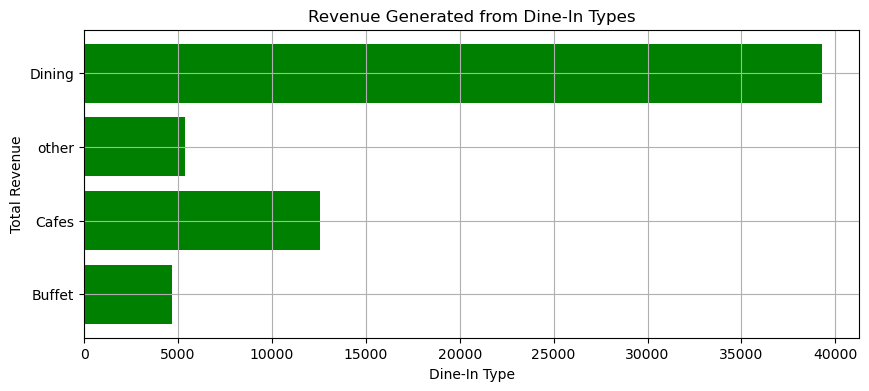

In [11]:
fig, ax = plt.subplots(figsize=(10,4))

ax.barh(('Buffet', 'Cafes', 'other', 'Dining'), (buffet_cost, cafes_cost, other_cost, dining_cost),color = 'green')
ax.set_xlabel('Dine-In Type')
ax.set_ylabel('Total Revenue')
ax.set_title('Revenue Generated from Dine-In Types')
ax.grid('True')

In [12]:
zomato[zomato['approx_cost(for two people)'] > 800]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
22,Cafe Coffee Day,No,No,3.6/5,28,900,Cafes
48,Beijing Bites,Yes,No,3.7/5,679,850,Dining
63,Jeet Restaurant,No,Yes,4.0/5,808,850,Dining
97,Ayda Persian Kitchen,No,No,3.7/5,39,950,Dining
119,K27 - The Pub,No,No,3.1/5,30,900,Dining


##### 1.Comparing number of Online Orders to Offline Orders
##### 2.Comparing Booking To Non-Booking Orders

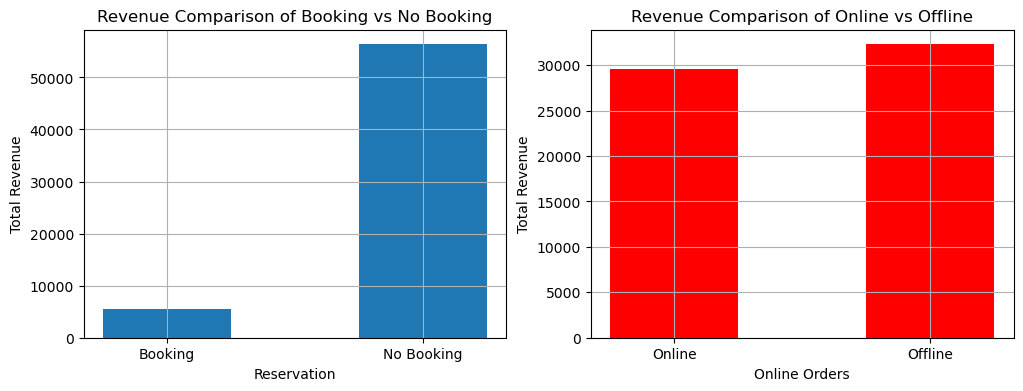

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.bar(('Booking','No Booking'), (total_bk,total_nbk), width = 0.5)
ax1.set_xlabel('Reservation')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Revenue Comparison of Booking vs No Booking')
ax1.grid('True')

ax2.bar(('Online','Offline'), (total_online_cost, total_offline_cost), color = 'red', width = 0.5)
ax2.set_xlabel('Online Orders')
ax2.set_ylabel('Total Revenue')
ax2.set_title('Revenue Comparison of Online vs Offline')
ax2.grid('True')

Text(0.5, 1.0, 'Relationship between Rating & Number of Votes')

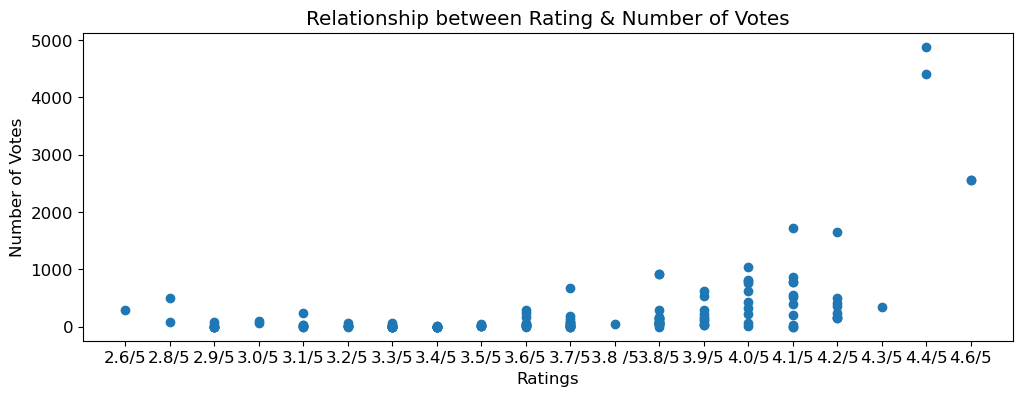

In [38]:
fig, (ax) = plt.subplots(figsize=(12,4))
zomato.sort_values(by = 'rate', inplace = True)
ax.scatter(zomato['rate'], zomato['votes'])
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Votes')
ax.set_title('Relationship between Rating & Number of Votes')

### What are the most preferred restaurants in terms of Votes and Ratings ?

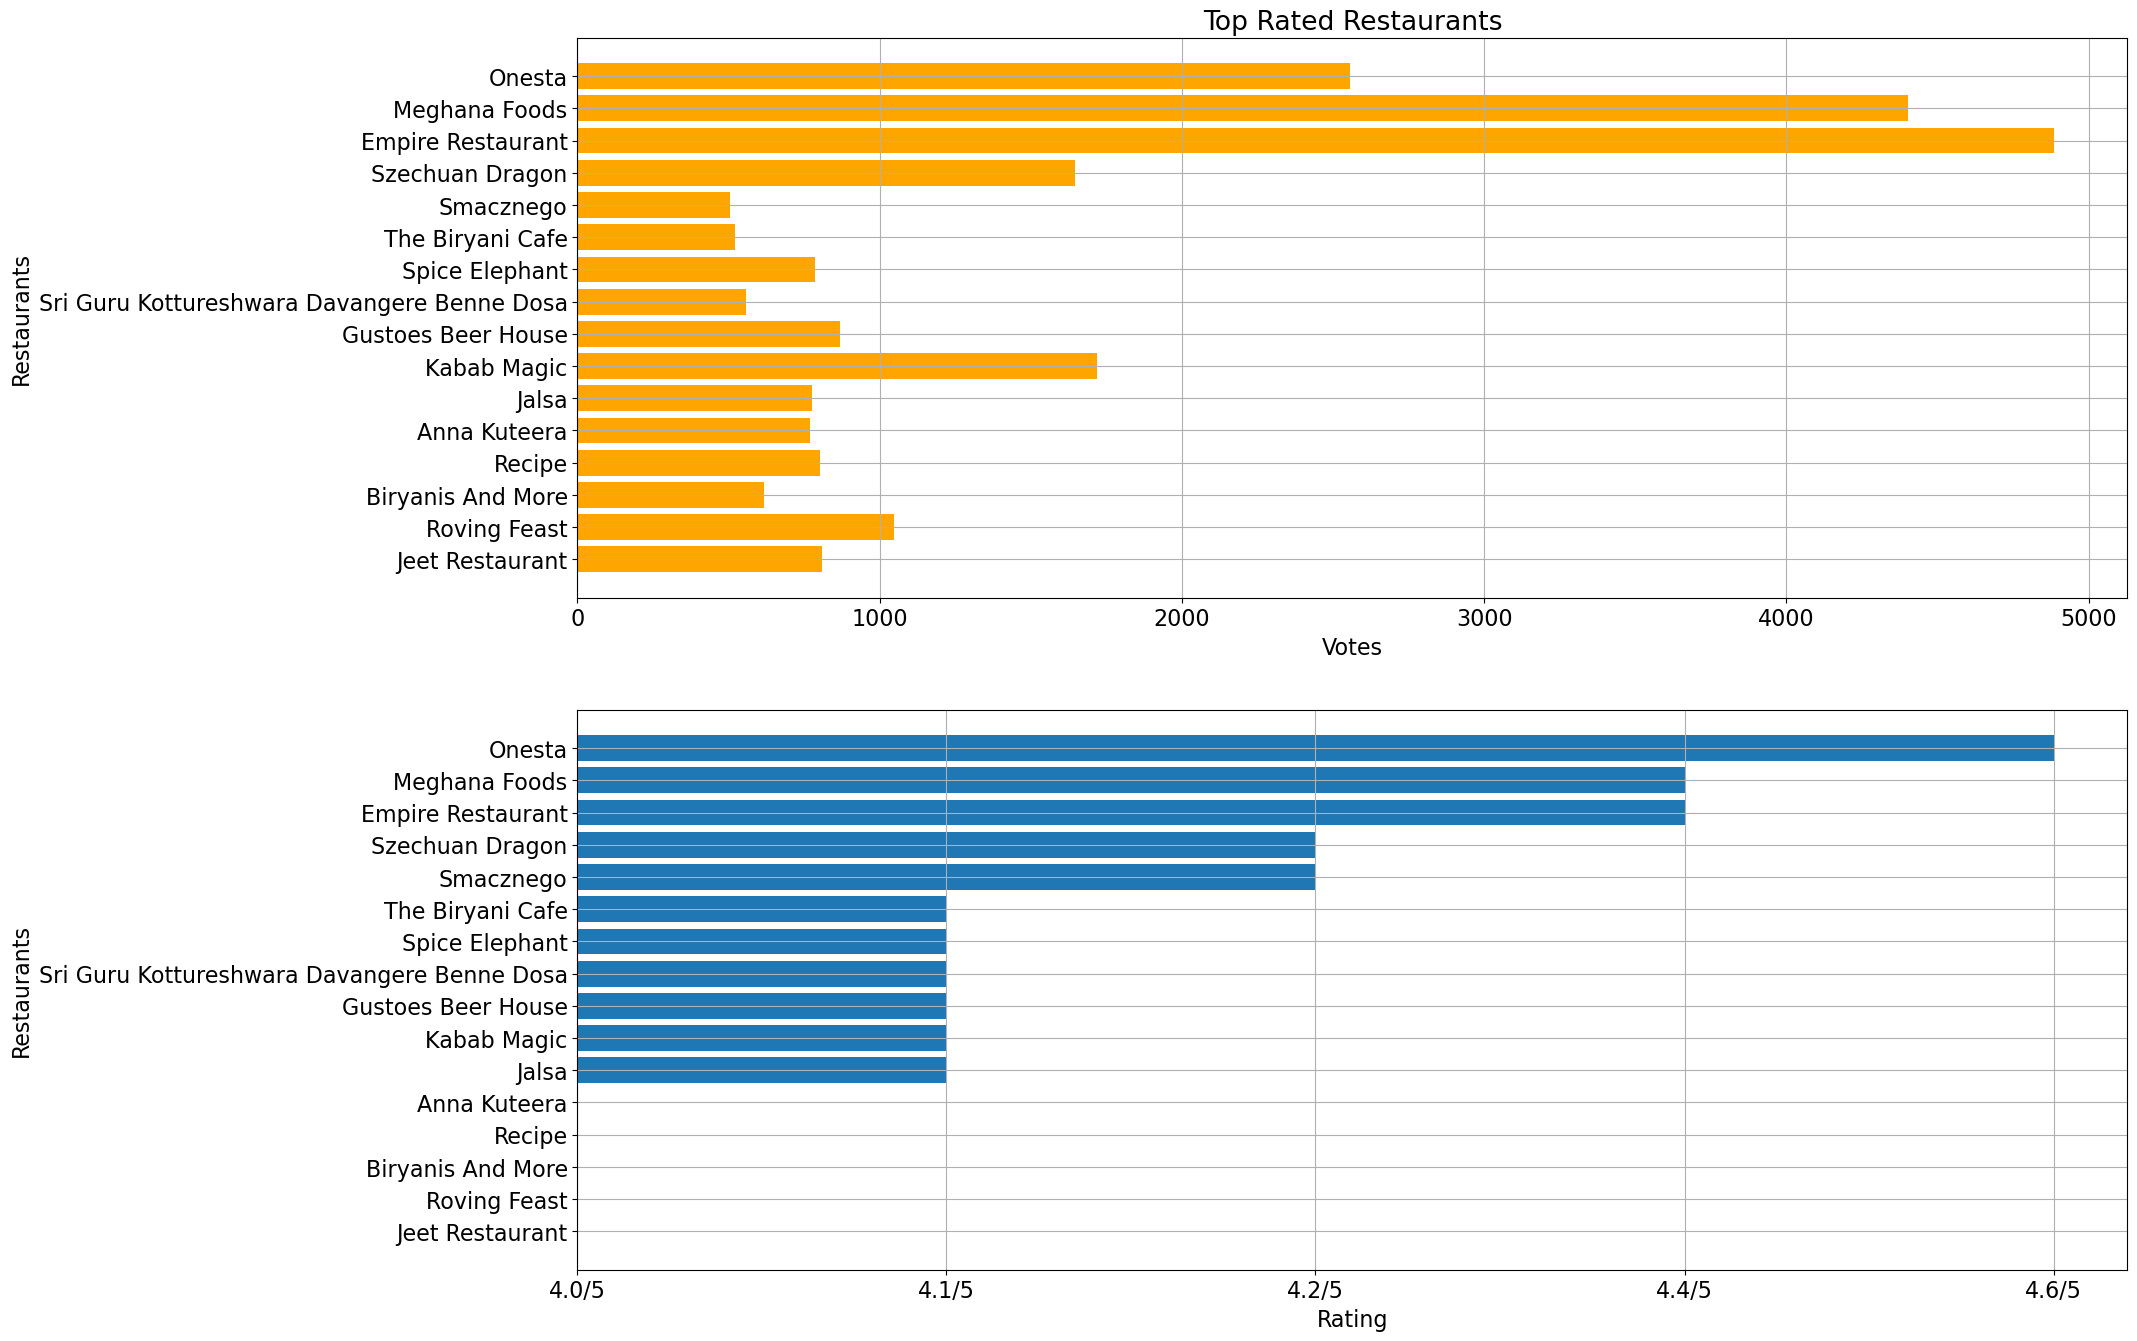

In [58]:
fig,(ax1, ax2) = plt.subplots(2,1, figsize = (20,16))

plt.rcParams.update({'font.size': 16})


ax1.barh(top_res_1["name"], top_res_1["votes"], color ='orange')
ax1.set_xlabel('Votes')
ax1.set_ylabel('Restaurants')
ax1.set_title('Top Rated Restaurants')
ax1.grid('True')

ax2.barh(top_res_1["name"], top_res_1["rate"])
ax2.set_xlabel('Rating')
ax2.set_ylabel('Restaurants')
ax2.grid('True')